# Education Statistics - What does it say about equality and quality?

Hemant Jain

DATA 512 Final Project
University of Washington, Fall 2018

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import seaborn as sns
sns.set()
# run `pip install mplcursors`. Used for interactive tooltip
import mplcursors
np.random.seed(4)

from operator import itemgetter

In [2]:
df = pd.read_csv("data/EdStatsData.csv")
# drop unnecessary information
df = df.drop('Unnamed: 69',axis=1)

## 1. Education and Income - Enrollment in schools based on income groups

**Question: Is there is a correlation between the number of youth attending school and the level of income?**

In [55]:
ig_df = pd.read_csv("data/income_groups.csv")
print("Types of income groups:",set(ig_df['Income group']))
income_group = dict(zip(ig_df['Economy'],ig_df['Income group']))
color_hash = dict(zip(ig_df['Economy'],np.random.rand(len(ig_df['Economy'].values),3)))
# del ig_df

Types of income groups: {'High income', 'Lower middle income', 'Low income', 'Upper middle income'}


In [4]:
measure = "Adjusted net enrolment rate, "
school_level = ['primary', 'lower secondary', 'upper secondary']
gender_type = ['both sexes \(\%\)', 'female \(\%\)', 'gender parity index \(GPI\)', 'male \(\%\)']

In [5]:
def get_vals_indicator(indicator):
    subset = df[df['Indicator Name'].str.contains(indicator)]
    country = list(subset['Country Name'].values)
#     country_code = subset['Country Code'].values
    indicator_code = subset['Indicator Code']
    val_df = pd.DataFrame()
    # between 2000 and 2016 (inclusive)
    for i in range(2000,2017):
        val_df[str(i)] = subset[str(i)]
    vals = val_df.values
    del val_df
    return vals, country

In [56]:
def plot_indicator(indicator,filtered,eco_color=True):
    vals, country = get_vals_indicator(indicator)
    filtered_index = [country.index(f) for f in filtered]
    years = np.arange(2000,2017)
    
    vals = np.array(itemgetter(*filtered_index)(vals))
    country = itemgetter(*filtered_index)(country)
    if eco_color:
        colors = [color_levels[income_group[c]] for c in country]
    else:
        colors = [color_hash[c] for c in country]
    
    fig = plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_axes([0.05, 0.05, 0.5, 0.9])
    for i,c,l in zip(vals,colors,country):
        sns.lineplot(years,i,color=c,label=l)
        plt.legend(country)    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel("Time (years)")
    plt.ylabel(indicator.replace('\\',''))
    plt.title(indicator.replace('\\','')+" vs Time (years)")

    mplcursors.cursor().connect(
    # mplcursors.cursor(hover=True).connect(
        "add", lambda sel: sel.annotation.set_text(sel.artist.get_label()\
                            +" - "+income_group[sel.artist.get_label()]))

    plt.show()

In [7]:
def get_clean_corrcoef_income(indicator,filtered):
    vals, country = get_vals_indicator(indicator)
    filtered_index = [country.index(f) for f in filtered]
    vals = np.array(itemgetter(*filtered_index)(vals))
    country = list(itemgetter(*filtered_index)(country))
    
    # ignore axis where all are nans (sorted reverse for deletion), for all except those, take the mean
    all_nans = sorted(np.where(np.min(np.isnan(vals),axis=1)==True)[0],reverse=True)
    for ind in all_nans:
        vals = np.delete(vals,ind,0)
        del country[ind]

    ranks = list(color_levels.keys())[::-1]
    class_label = [ranks.index(income_group[c]) for c in country]

    return np.corrcoef(np.nanmean(vals,axis=1),class_label)[1,0]

In [8]:
hinc = ['United States','Australia','United Kingdom','Canada']
# 2 lower and two higher middle income
minc = ['Malaysia','Russian Federation','Vietnam','India']
linc = ['Ethiopia','Yemen, Rep.','Niger','Mozambique']

color_levels = {'High income' : 'g',
    'Upper middle income' : 'b',
    'Lower middle income': 'y',
    'Low income' : 'r'}

**Legened for income levels:**

Green -> High Income 

Blue -> Higher Middle Income 

Yellow -> Lower Middle Income

Red -> Low Income

### Net enrolment rate in Primary schools (%)

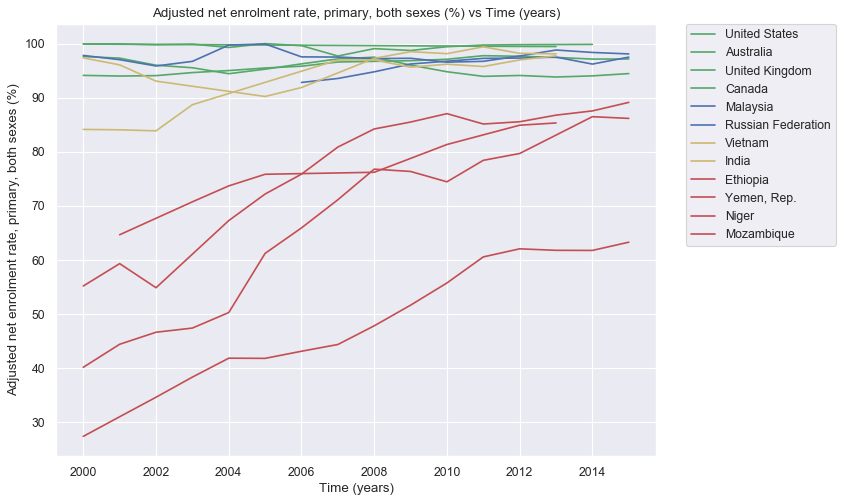

In [9]:
indicator = measure+school_level[0]+", "+gender_type[0]
plot_indicator(indicator,hinc+minc+linc)

### Net enrolment rate in Lower Secondary schools (%)

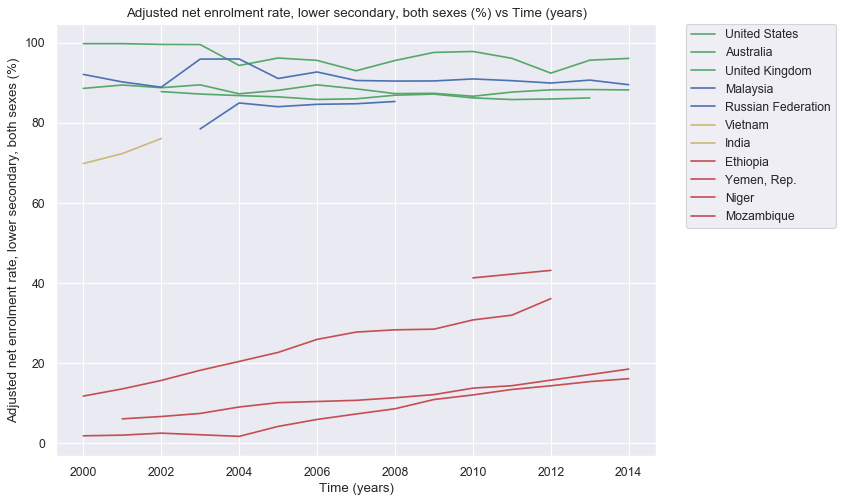

In [10]:
indicator = measure+school_level[1]+", "+gender_type[0]
plot_indicator(indicator,hinc+minc+linc)

### Net enrolment rate in Higher Secondary schools (%)

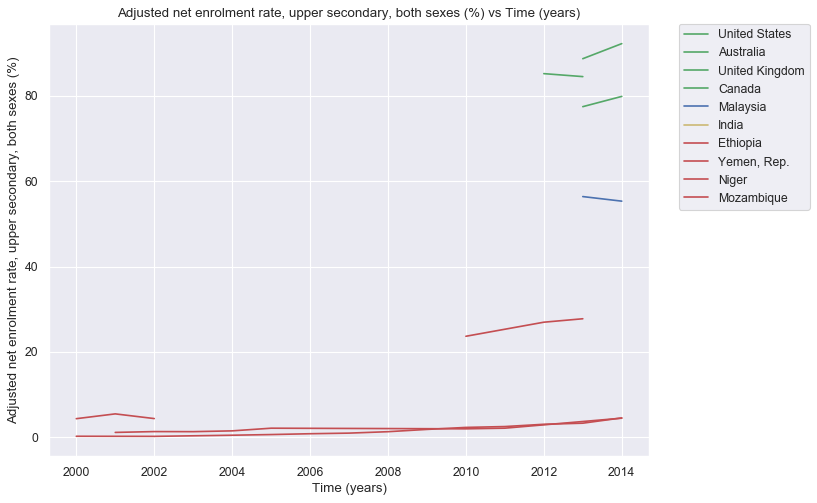

In [11]:
indicator = measure+school_level[2]+", "+gender_type[0]
plot_indicator(indicator,hinc+minc+linc)

In [12]:
for gen in (0,1,3):
    print("Correlation coefficient between net enrollment rate (primary school) for",\
          gender_type[gen].replace('\\',''),"and income:",
          get_clean_corrcoef_income(measure+school_level[0]+", "+gender_type[gen],hinc+minc+linc))

Correlation coefficient between net enrollment rate (primary school) for both sexes (%) and income: 0.7905442132607237
Correlation coefficient between net enrollment rate (primary school) for female (%) and income: 0.8443040775001447
Correlation coefficient between net enrollment rate (primary school) for male (%) and income: 0.7498585815189364


In [13]:
for gen in (0,1,3):
    print("Correlation coefficient between net enrollment rate (lower secondary school) for",\
          gender_type[gen].replace('\\',''),"and income:",
          get_clean_corrcoef_income(measure+school_level[1]+", "+gender_type[gen],hinc+minc+linc))

Correlation coefficient between net enrollment rate (lower secondary school) for both sexes (%) and income: 0.8864870804399166
Correlation coefficient between net enrollment rate (lower secondary school) for female (%) and income: 0.9241009345919866
Correlation coefficient between net enrollment rate (lower secondary school) for male (%) and income: 0.893380541198392


In [14]:
for gen in (0,1,3):
    print("Correlation coefficient between net enrollment rate (higher secondary school) for",\
          gender_type[gen].replace('\\',''),"and income:",
          get_clean_corrcoef_income(measure+school_level[2]+", "+gender_type[gen],hinc+minc+linc))

Correlation coefficient between net enrollment rate (higher secondary school) for both sexes (%) and income: 0.9709843448629143
Correlation coefficient between net enrollment rate (higher secondary school) for female (%) and income: 0.9816838774687192
Correlation coefficient between net enrollment rate (higher secondary school) for male (%) and income: 0.9572617759475552


**Conclusion:**

As we can see, there if definitely a **strong correlation between (%) of youth enrolled in schools and the income level** of that country. In fact, as we break this for the three different school groups, we see that the **correlation becomes stronger as the education level progresses**. 

This can be attributed to the fact that **education costs become less affordable** for lower (and middle) income groups as the youth move from primary to lower secondary and higher secondary schools.

## 2. Education and 'Gender' - Enrollment rate in schools based on gender

### Enrollment rate of Females in primary schools (%)

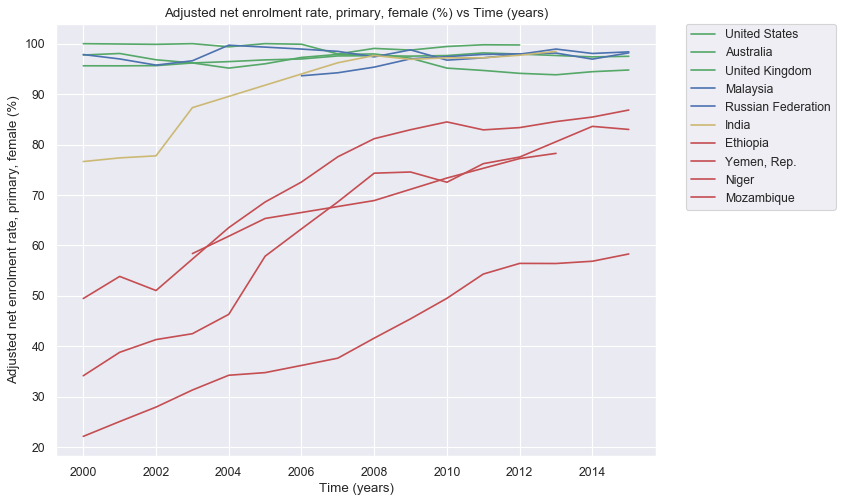

In [15]:
indicator = measure+school_level[0]+", "+gender_type[1]
plot_indicator(indicator,hinc+minc+linc)

### Enrollment rate of Males in primary schools (%)

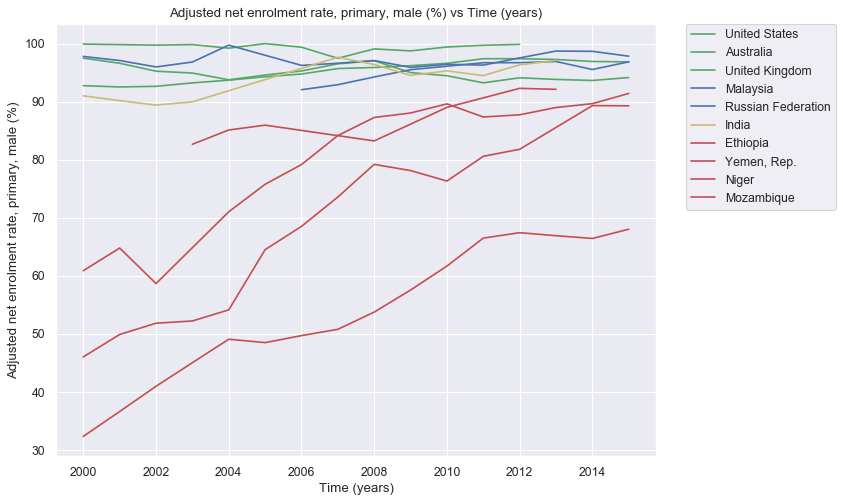

In [16]:
indicator = measure+school_level[0]+", "+gender_type[3]
plot_indicator(indicator,hinc+minc+linc)

In [17]:
def get_clean_corrcoef_gender(sch_level,filtered):
    vals_male, country_male = get_vals_indicator(measure+sch_level+", "+gender_type[3])
    vals_female, country_female = get_vals_indicator(measure+sch_level+", "+gender_type[1])
    filtered_index = [country_male.index(f) for f in filtered]

    vals_male = np.array(itemgetter(*filtered_index)(vals_male))
    country_male = list(itemgetter(*filtered_index)(country_male))
    vals_female = np.array(itemgetter(*filtered_index)(vals_female))
    country_female = list(itemgetter(*filtered_index)(country_female))
    
    # ignore axis where all are nans (sorted reverse for deletion), for all except those, take the mean
    all_nans = sorted(np.where(np.min(np.isnan(vals_male),axis=1)==True)[0],reverse=True)
    for ind in all_nans:
        vals_male = np.delete(vals_male,ind,0)
        del country_male[ind]
    
    all_nans = sorted(np.where(np.min(np.isnan(vals_female),axis=1)==True)[0],reverse=True)
    for ind in all_nans:
        vals_female = np.delete(vals_female,ind,0)
        del country_female[ind]

    class_label = [0]*len(country_male) + [1]*len(country_female)

    return np.corrcoef(np.nanmean(np.append(vals_male,vals_female,axis=0),axis=1),class_label)[1,0]

Let us do this on the basis of income levels. **We will focus on high and low income levels.**

For **low income**:

In [18]:
for sc in (0,1,2):
    print("Correlation coefficient between net enrollment rate ("+school_level[sc]+" school) and gender:",
          get_clean_corrcoef_gender(school_level[sc],linc))

Correlation coefficient between net enrollment rate (primary school) and gender: -0.3995971749509495
Correlation coefficient between net enrollment rate (lower secondary school) and gender: -0.2350184039235554
Correlation coefficient between net enrollment rate (upper secondary school) and gender: -0.15949020570650704


As we can see, there if definitely a **significant negative correlation between (%) of youth enrolled in schools and their gender**. (Negative sign shows that a higher % of men are enrolled than women in low income countries)

For **high income**:

In [19]:
for sc in (0,1,2):
    print("Correlation coefficient between net enrollment rate ("+school_level[sc]+" school) for and gender:",
          get_clean_corrcoef_gender(school_level[sc],hinc))

Correlation coefficient between net enrollment rate (primary school) for and gender: 0.2672277228673321
Correlation coefficient between net enrollment rate (lower secondary school) for and gender: 0.28495045723031975
Correlation coefficient between net enrollment rate (upper secondary school) for and gender: 0.3254144579257231


As we can see, there if definitely a **significant positive correlation between (%) of youth enrolled in schools and their gender**. (Positive sign shows that a higher % of women are enrolled than men in high income countries)

Essentially, for **low income countries, a higher % of men go to (are enrolled in) schools than women** and **for high income countries, a higher % of women go to (are enrolled in) schools than men**. 

It is interesting to see how the results are so different. This can be attributed to women empowerment and subsidized education for the female population in high income countries and the lack of the same thereof in low income countries. It appears to be true that there is a bias against female education in low income countries that most likely stems from cultural and social beliefs that have propagated down the ages.

This article - [Why girls in India are still missing out on the education they need
](https://www.theguardian.com/education/2013/mar/11/indian-children-education-opportunities) tries to explain the same problem in some detail.

_"While girls attend primary school in roughly equal numbers to boys, the gap widens as they get older and more are forced to drop out to help with work at home or get married."_ 

## 3. Goverments role in Education - Education expenditure

**Question: Do governments change their investment in education over time? Is it related to their annual GDP?**

In [20]:
gov_indicator = "Expenditure on education as \% of total government expenditure \(\%\)","Government expenditure on education as \% of GDP \(\%\)"

First, I analysed the **Edcucation expense as a % of the total government expenditure** from $2000$ to $2017$, hoping if I correlated this with income level of the country, I would be able to understand if countries with different income levels invest a higher or lower % of their expenditure on Education.

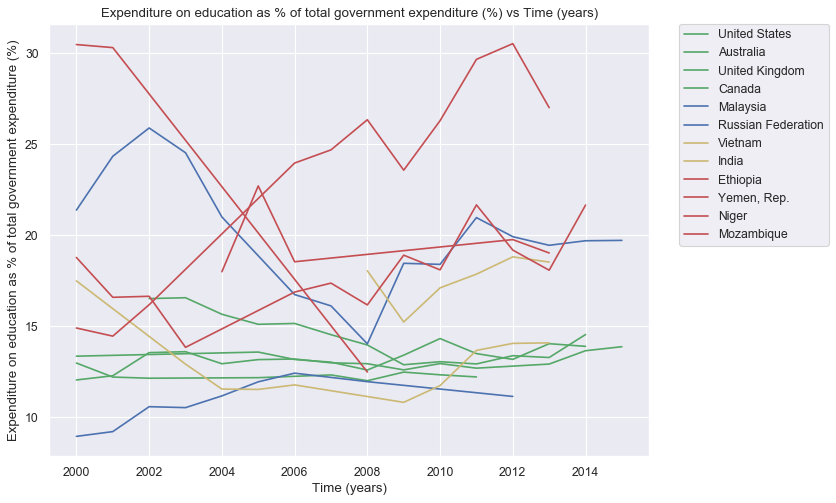

In [21]:
plot_indicator(gov_indicator[0],hinc+minc+linc)

In [22]:
print("Correlation coefficient between ",gov_indicator[0].replace('\\',''),"and income:",get_clean_corrcoef_income(gov_indicator[0],hinc+minc+linc))

Correlation coefficient between  Expenditure on education as % of total government expenditure (%) and income: -0.7391787899589942


Counter to my intuition, it appears that income negatively correlated with the % of total expenditure that governments invested in Education. The World Bank published an [article](http://blogs.worldbank.org/education/why-education-matters-economic-development) that suggested High Income countries have a motivation to invest more money in Education. The article states that:

**"In a nutshell, the Human Capital Theory posits that investing in education has a payoff in terms of higher wages."**

I expected Low Income countries would be unable to spend large portions of their expenditure on Education and thereby see a positive correlation between income and % expenditure on Education. I was wrong and the observation was the exact opposite.

I found a chart from this [article](https://www.fool.com/investing/general/2012/04/13/how-rich-countries-spend-their-money.aspx) that described how rich countries spend their money:

![Source: Bureau of Labor Statistics.](https://g.fool.com/img/editorial/RichSpend0413.png)

The article and chart explain that a small portion of money is invested in Education in High Income countries and the larger portions go to Housing, Culture/Entertainment, Healthcare etc. as they focus more on providing a better living healthcare and social infrastructure and less on Education. 

I wanted to verify that this indeed was the case and thus I followed by analyzing the **Education expense as a % of the total GDP** from $2000$ to $2017$. This would help me understand if countries with different income levels invest a higher or lower % of their GDP on Education. 

Why GDP? -> Government expenditure is a small part of GDP and while their GDP grows, government expenditure may not. This means that Education expenditure is scaled by GDP, a more accurate measure of how well the country is performing economically.

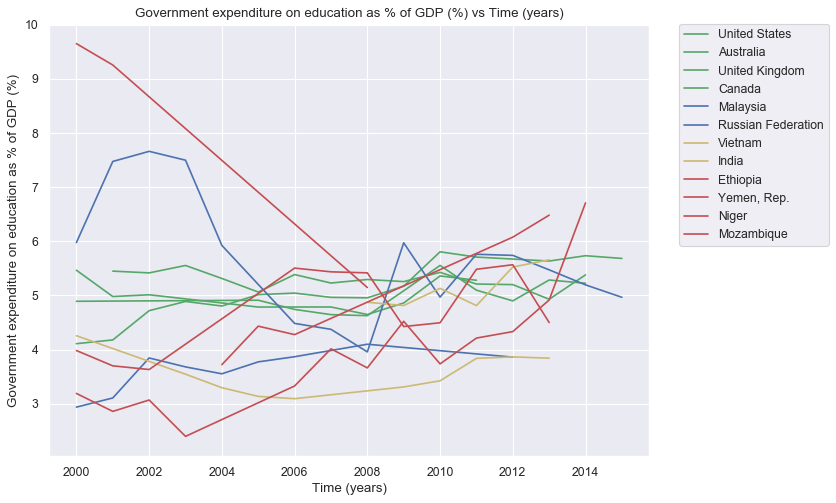

In [23]:
plot_indicator(gov_indicator[1],hinc+minc+linc)

In [24]:
print("Correlation coefficient between ",gov_indicator[1].replace('\\',''),"and income:",get_clean_corrcoef_income(gov_indicator[1],hinc+minc+linc))

Correlation coefficient between  Government expenditure on education as % of GDP (%) and income: -0.0944659285247055


There is negligible correlation between % of GDP invested in education and income level of the country. Thus, we see that the education expenditure is not significantly effected by the income level of the country i.e. **In general, both rich and poor countries invested similar portions of their GDP in education.**

There seems to be very less variability (of % of GDP invested in education) between High Income countries and more as we move towards the Low income countries. This is probably because high income countries have a GDP large enough to invest consistently and easily in education, while lower income countries struggle to do so as they are forced to shift priorities between sectors based on requirements.

**Answer:**
1. **Percentage investment of GDP in education is stable in High Income countries (more or less constant over the years) and volatile in Low Income countries (changes a lot over the years).**
2. **Governments try to invest an amount in education that is proportional to their GDP.**

**Question: In what components of education does the government invest more in and which does it invest less?**

In [25]:
comp_indicator = ["Capital expenditure as \% of total expenditure in public institutions \(\%\)","All staff compensation as \% of total expenditure in public institutions \(\%\)", "Current expenditure other than staff compensation as \% of total expenditure in public institutions \(\%\)",]

In [27]:
width = 0.35
def plot_indicator_stack_bar(indicators,filtered,by_year=False):
    mega_vals = [0]*len(indicators)
    mega_ctry = [0]*len(indicators)
    p = [0]*len(indicators)
    if not by_year:
        filtered = filtered[:9]+filtered[10:]
    for i, indicator in enumerate(indicators):
        vals, country = get_vals_indicator(indicator)
        filtered_index = [country.index(f) for f in filtered]
        years = np.arange(2000,2015)

        vals = np.array(itemgetter(*filtered_index)(vals))
        country = itemgetter(*filtered_index)(country)
        mega_vals[i] = vals[:,:-2]
        mega_ctry = country

    fig = plt.figure(figsize=(15, 6), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_axes([0.05, 0.05, 0.5, 0.85])

    if by_year:
        p[0] = plt.bar(years, np.nanmean(mega_vals[0],axis=0), width)
        p[1] = plt.bar(years, np.nanmean(mega_vals[1],axis=0), width, bottom=np.nanmean(mega_vals[0],axis=0))
        p[2] = plt.bar(years, 100 - (np.nanmean(mega_vals[0],axis=0)+np.nanmean(mega_vals[1],axis=0)), width, \
                       bottom=np.nanmean(mega_vals[0],axis=0) + np.nanmean(mega_vals[1],axis=0))
        plt.xticks(years,years)
        plt.xlabel("Time (years)")
        plt.title("Government expenditure (%) in public institutions (per category) vs Time (years)")

        plt.legend(indicators)
        plt.legend((p[0][0], p[1][0], p[2][0]), ('Capital expenditure', 'All staff compensation', \
                                                     'Current expenditure other than staff compensation'), \
                  bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.ylabel("Government expenditure (%)")
    else:
        p[0] = plt.barh(mega_ctry, np.nanmean(mega_vals[0],axis=1), width)
        p[1] = plt.barh(mega_ctry, np.nanmean(mega_vals[1],axis=1), width, left=np.nanmean(mega_vals[0],axis=1))
        p[2] = plt.barh(mega_ctry, 100-(np.nanmean(mega_vals[0],axis=1)+np.nanmean(mega_vals[1],axis=1)), width,\
                       left=np.nanmean(mega_vals[0],axis=1) + np.nanmean(mega_vals[1],axis=1))

        plt.yticks(mega_ctry,mega_ctry,rotation=350)
        plt.xlabel("Country")
        plt.title("Government expenditure (%) in public institutions (per category) by Country")

        plt.legend(indicators)
        plt.legend((p[0][0], p[1][0], p[2][0]), ('Capital expenditure', 'All staff compensation', \
                                                     'Current expenditure other than staff compensation'), \
                  bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
        plt.ylabel("Country")
        plt.gcf().subplots_adjust(top=0.55)
        ax.xaxis.set_label_position('top') 
        ax.set_xlabel("Government expenditure (%)", fontsize=12)
        ax.yaxis.set_ticks_position('right') 
        plt.show()

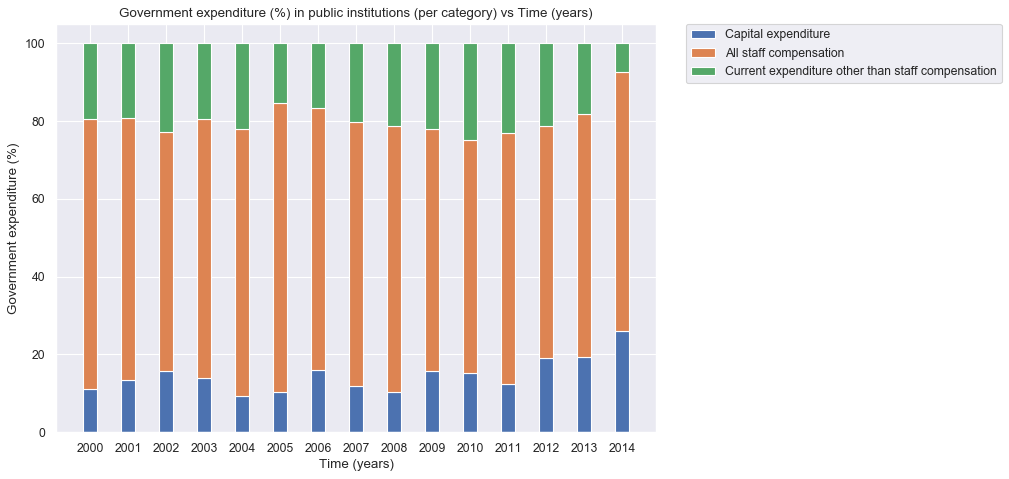

In [28]:
plot_indicator_stack_bar(comp_indicator,hinc+minc+linc,by_year=True)

**Answer:**

Aggregated across 12 countries (uniformly selected from each income group), there seems to be very small changes in the education components that governments invest in. 

There is a significant increase in the percentage of Capital expenditure around the world and this can be explained by the fact that schools are working to provide better infrastructure and facilities. 

The percentage of non-staff expenditure however has gone down and the percentage of staff wages have stayed constant. The parts of education that can be automated and simplified are being done and as technology is being embraced, there is a fall in current non-staff expense.

As we can see, staff wages are still the majority amounting to around 65% on average, while capital expense and non-staff current expense varies between 10% and 25%.

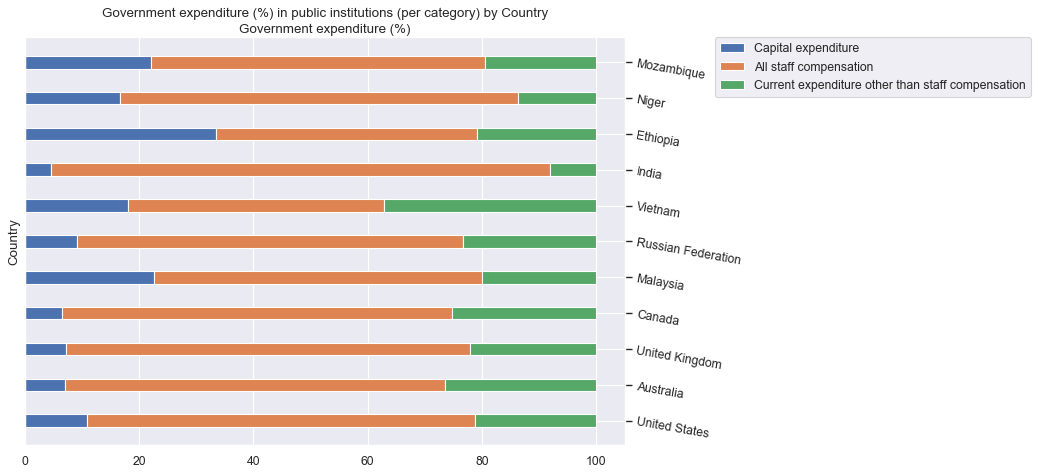

In [29]:
# removed Yemen (Bottom to top the income group falls from high to low)
plot_indicator_stack_bar(comp_indicator,hinc+minc+linc)

**Answer:**

Staff wages remain similar across all 12 countries but current non-staff expense falls in low income group and capital expense increases. This correlates with the slow adoption of technology for automation and simplification that cause increased non-staff expense and lower investment in infrastructure and facilities that cause decreased capital expense.

## 4. Quality of Education

**Question: Is the learning outcomes of different subjects negatively correlated i.e. does performing well in one subject correlate with performing badly in another subject?**

I used the [PISA](http://www.oecd.org/pisa/data/) test scores as metric of comparison. The test is a 3 hours with three sections - **mathematics, science and reading**.

*The Programme for International Student Assessment (PISA) is a triennial international survey which aims to evaluate education systems worldwide by testing the skills and knowledge of 15-year-old students.*

The data is issued by the Organisation for Economic Co-operation and Development ([OECD](http://www.oecd.org/about/)).

<IPython.core.display.Javascript object>


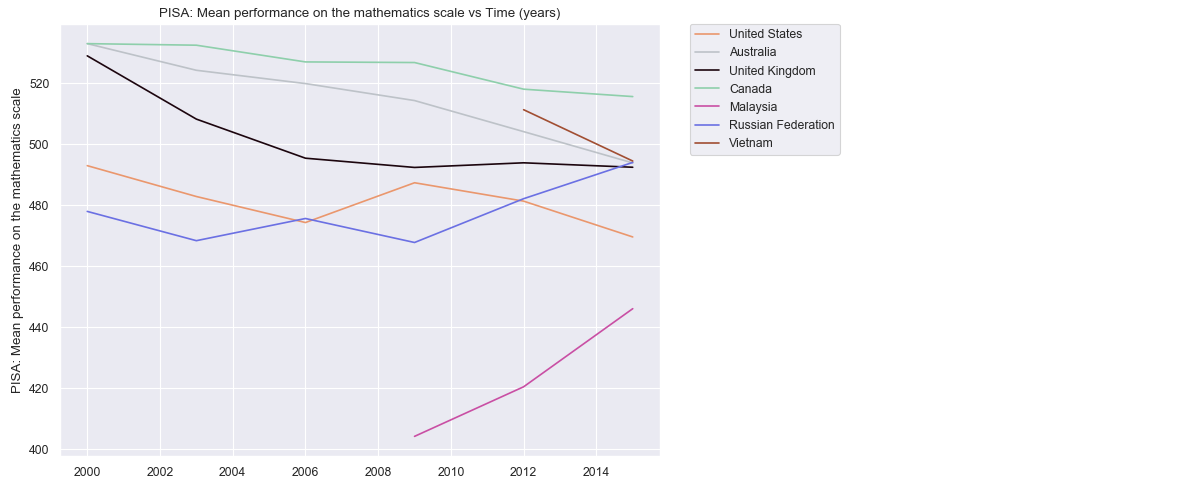

In [62]:
plot_indicator("PISA: Mean performance on the mathematics scale",hinc+minc+linc,eco_color=False)

<IPython.core.display.Javascript object>


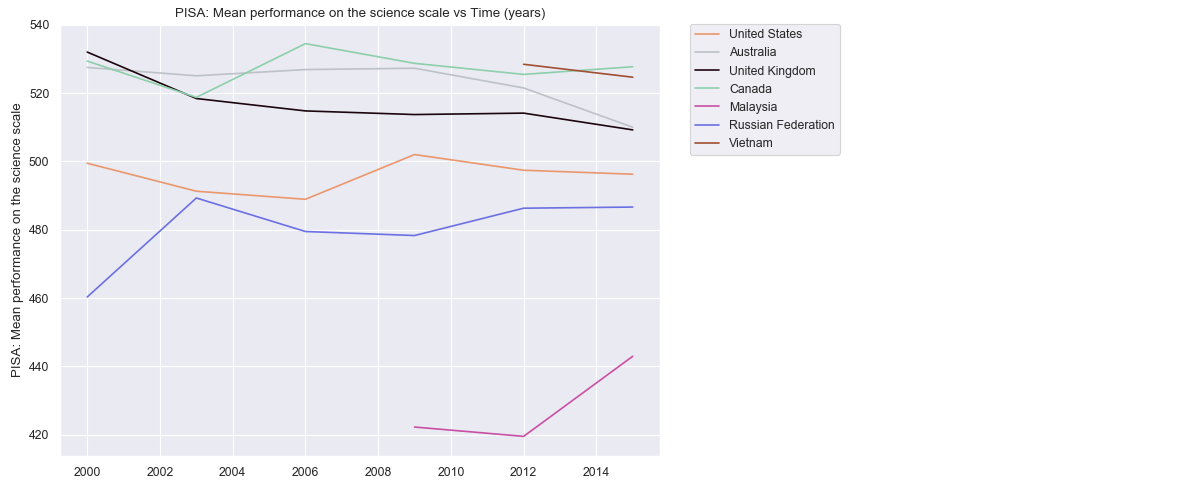

In [57]:
plot_indicator("PISA: Mean performance on the science scale",hinc+minc+linc,eco_color=False)

<IPython.core.display.Javascript object>


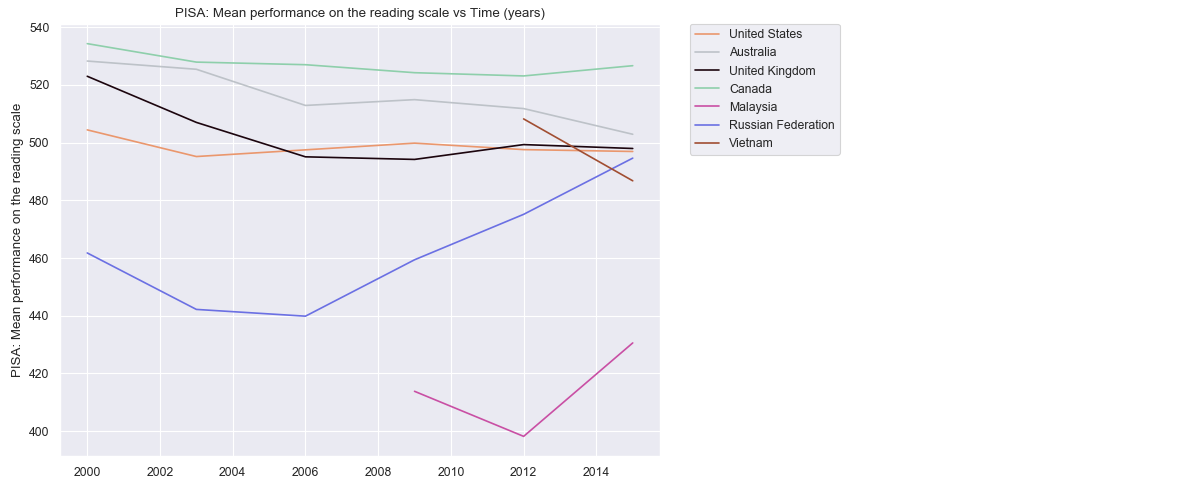

In [58]:
plot_indicator("PISA: Mean performance on the reading scale",hinc+minc+linc,eco_color=False)

In [95]:
hnm_inc = ['United States','Australia','United Kingdom','Canada','Malaysia','Russian Federation','Vietnam']
score = dict()
category = ["reading","mathematics","science"]

for cat in category:
    vals, country = get_vals_indicator("PISA: Mean performance on the "+cat+" scale")
    filtered_index = [country.index(f) for f in hnm_inc]

    vals = np.array(itemgetter(*filtered_index)(vals))
    country = itemgetter(*filtered_index)(country)
    score[cat] = np.nanmean(vals,axis=1)

In [109]:
for c1, c2 in [('mathematics', 'reading'),('mathematics', 'science'),('science', 'reading')]:
    print("Correlation between performance in",c1,"and",c2,":",np.corrcoef(score[c1],score[c2])[1,0])

Correlation between performance in mathematics and reading : 0.966594035862404
Correlation between performance in mathematics and science : 0.9759302684439629
Correlation between performance in science and reading : 0.9588064863133359


**Answer:**

We see a positive correlation between mathematics, science and reading and this explains that good scores in one subject are not correlated with bad scores on another. **Countries that do good in one subject tend to do good in the others as well**. This shows that none of the three fields gets a special focus/preference (till the age of 15) that negatively impacts the other subjects.

**Question:**  Which subjects have seen improvements over time in terms of scores? Has the academic curriculum become harder in the recent years?

In [122]:
hnm_inc = ['United States','Australia','United Kingdom','Canada','Malaysia','Russian Federation','Vietnam']
category = ["reading","mathematics","science"]

for cat in category:
    vals, country = get_vals_indicator("PISA: Mean performance on the "+cat+" scale")
    filtered_index = [country.index(f) for f in hnm_inc]

    vals = np.array(itemgetter(*filtered_index)(vals))
    print("Correlation between performance in",cat,"and time (years):", \
          np.corrcoef(np.nanmean(vals,axis=0)[~np.isnan(np.nanmean(vals,axis=0))], \
                np.arange(2000,2017)[~np.isnan(np.nanmean(vals,axis=0))])[1,0])

/home/hemant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/home/hemant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


Correlation between performance in reading and time (years): -0.8108364047699489
Correlation between performance in mathematics and time (years): -0.8866552151879683
Correlation between performance in science and time (years): -0.7940151172423099


**Answer:** 

We see that **the scores correlate negatively with time**. This means that as time progresses, the PISA scores in all three subjects tend to fall. This can be explained by the increasing difficulty of the test, which is designed to represent a standard test for proficiency in that subject. 

By extension, this can be one of two things:
1. **Academic curriculum around the world have become harder/more competitive** and so has the PISA test and thus we see scores falling i.e. the proficiency requirements keep increasing every year. 
2. **Academic curriculum has become simpler while the PISA Test has evolved.** Thus causing students to get a relatively lower score as the bar is set higher for them.